In [68]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#from scipy.stats import info

In [2]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

slope:-0.4151902779150917, intercept: 24.033106174123883


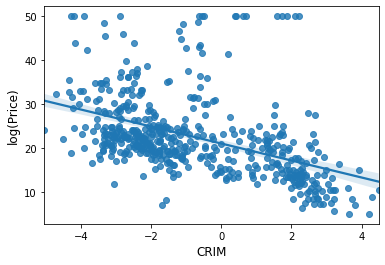

C:\Users\ASUS\AppData\Local\Temp/ipykernel_26336/4294773810.py:4: RuntimeWarning: divide by zero encountered in log
  sns.regplot(x = np.log(boston.data[:, index]), y = boston.target)
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


slope:0.1421399941553533, intercept: 20.917579117799875


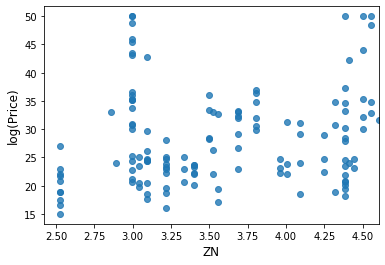

slope:-0.6484900536157114, intercept: 29.754896511928433


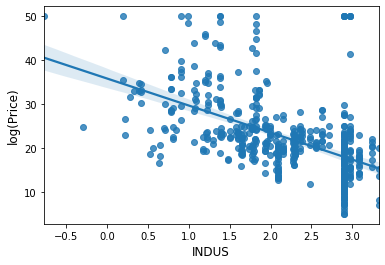

C:\Users\ASUS\AppData\Local\Temp/ipykernel_26336/4294773810.py:4: RuntimeWarning: divide by zero encountered in log
  sns.regplot(x = np.log(boston.data[:, index]), y = boston.target)
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


slope:6.346157112526484, intercept: 22.0938428874735


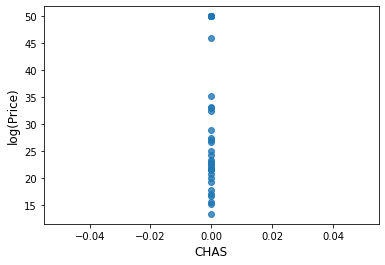

slope:-33.916055008661125, intercept: 41.34587446797326


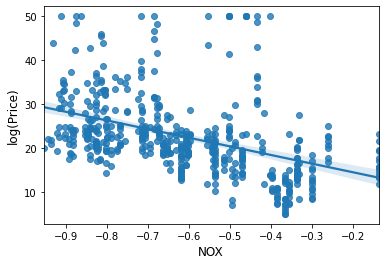

slope:9.102108981180312, intercept: -34.67062077643856


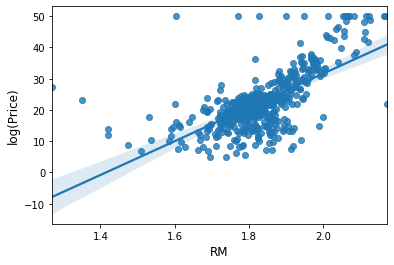

slope:-0.12316272123567935, intercept: 30.97867776261801


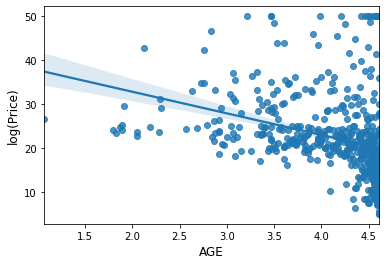

slope:1.0916130158411104, intercept: 18.390088330493366


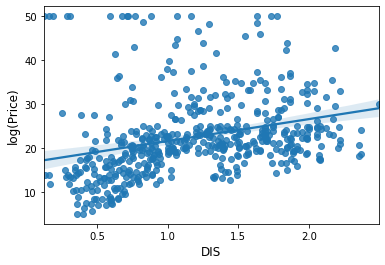

slope:-0.40309539555252893, intercept: 26.382128362272372


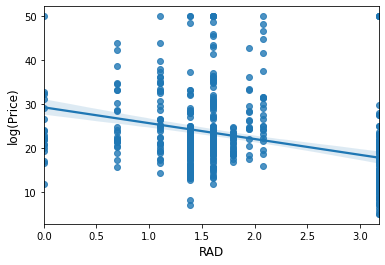

slope:-0.02556809948198727, intercept: 32.97065449366635


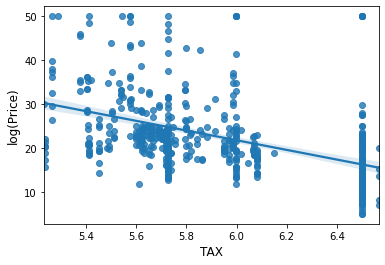

slope:-2.1571752960609727, intercept: 62.34462747483269


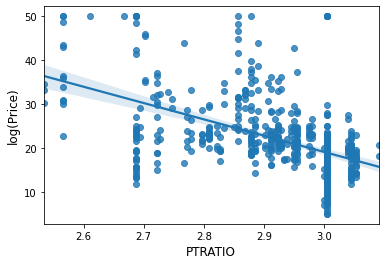

slope:0.03359306011501361, intercept: 10.551034138417155


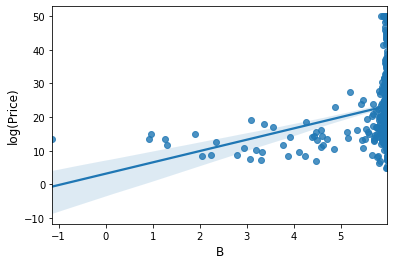

slope:-0.9500493537579918, intercept: 34.553840879383095


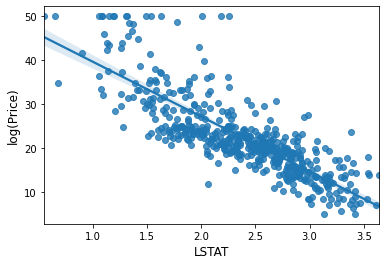

In [18]:
#Regression plots
for index, feature_name in enumerate(boston.feature_names):
    #plt.figure(figsize=(5, 4))
    sns.regplot(x = np.log(boston.data[:, index]), y = boston.target)
    print(f'slope:{(np.polyfit(boston.data[:, index], boston.target, 1))[0]}, intercept: {(np.polyfit(boston.data[:, index], boston.target, 1))[1]}')
    plt.ylabel('log(Price)', size=12)
    plt.xlabel(f'{feature_name}', size=12)
    plt.show()

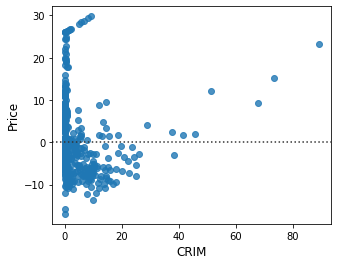

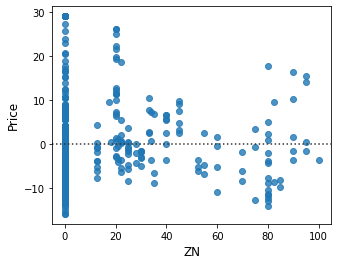

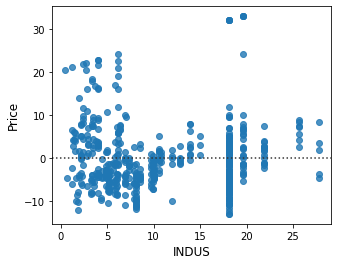

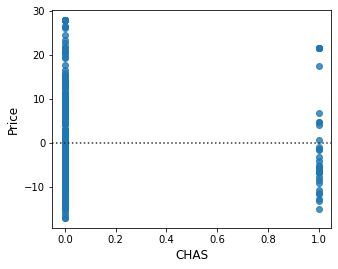

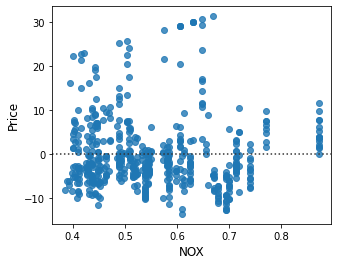

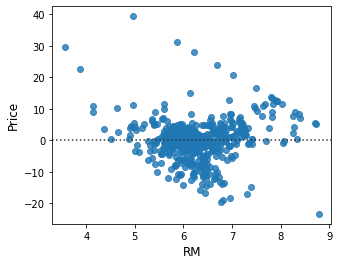

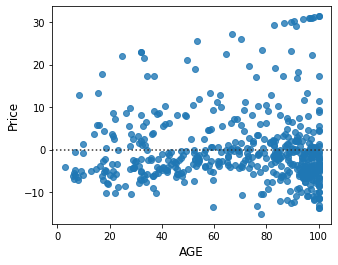

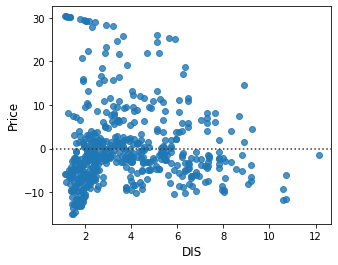

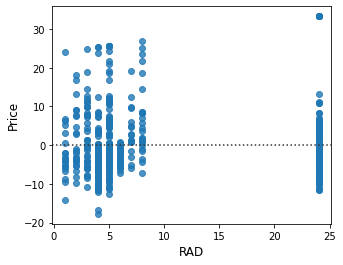

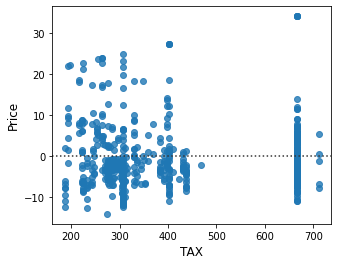

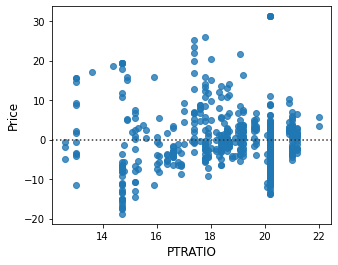

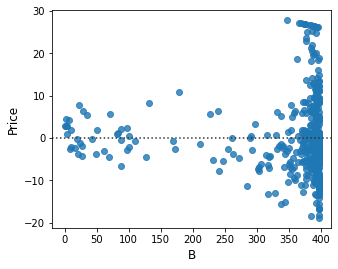

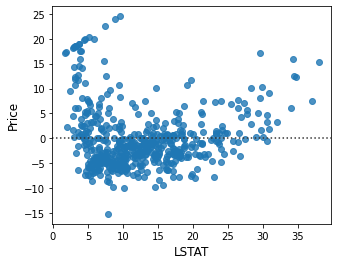

In [6]:
#residual plots
for index, feature_name in enumerate(boston.feature_names):
    plt.figure(figsize=(5, 4))
    sns.residplot(x = boston.data[:, index], y = boston.target)
    plt.ylabel('Price', size=12)
    plt.xlabel(feature_name, size=12)
    plt.show()

<AxesSubplot:>

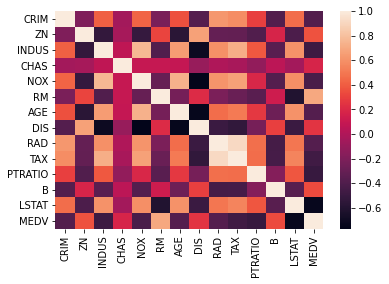

In [32]:
#correlation map
#df.insert(13, 'MEDV', boston.target)
sns.heatmap(df.corr())

In [61]:
corr = pd.DataFrame(df.corr())

In [62]:
def limitcorr(x):
    if x>0.6 or x<-0.6:
        return x
    else:
        return np.nan

In [63]:
for x in corr.columns:
    corr[x] = corr[x].apply(lambda y:limitcorr(y))

In [64]:
corr.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.625505,NaN,NaN,NaN,NaN,NaN
ZN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.664408,NaN,NaN,NaN,NaN,NaN,NaN
INDUS,NaN,NaN,1.000000,NaN,0.763651,NaN,0.644779,-0.708027,NaN,0.720760,NaN,NaN,0.6038,NaN
CHAS,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOX,NaN,NaN,0.763651,NaN,1.000000,NaN,0.731470,-0.769230,0.611441,0.668023,NaN,NaN,NaN,NaN


<AxesSubplot:>

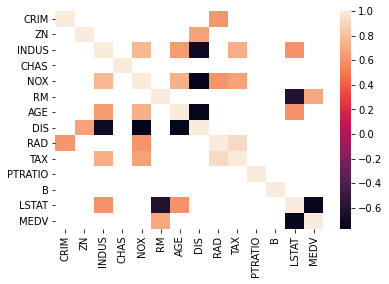

In [65]:
sns.heatmap(corr)

In [99]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [87]:
cols = ['INDUS', 'NOX', 'RM']
df.drop(cols, axis=1, inplace=True)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(df, boston.target, test_size=0.25, random_state=42)
model = LinearRegression().fit(X_train, y_train)

In [101]:
model.score(X_test, y_test)

0.6844267283527126

In [94]:
#multiple regression coefficients and intercept
print(model.coef_, model.intercept_)

[-1.25449219e-01  5.62580565e-02  2.62764991e+00  9.09230311e-04
 -1.25384121e+00  3.75625072e-01 -1.86390820e-02 -9.15691688e-01
  1.17521764e-02 -8.59600616e-01] 54.447922586968524


In [10]:
y_pred = model.predict(y_train)
y_pred.size

506

6578


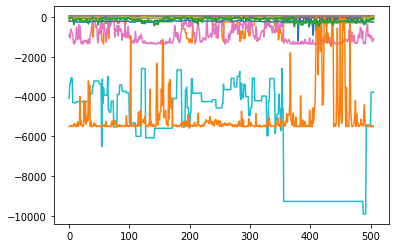

In [11]:
#Multiple regression plot? dimensionality?
mults = 0
for slope in model.coef_:
    mults += boston.data*slope

mults +=model.intercept_
print(mults.size)
plt.plot(mults)